In [2]:
from numpy import *
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
import matplotlib
import pandas as pd
#import datetime
import time
%matplotlib inline


def drawDat(Dat):
    fig=plt.figure(figsize=(20,10))
    ax=fig.add_subplot(111)
    ax.scatter(Dat[:,0].flatten().A[0],Dat[:,1].flatten().A[0],s=20,c='red')
    plt.xlim(0,len(Dat)+10)
    plt.ylim(0,35)
    plt.show()

def Score(rV,Rh,predic,result):
    N=len(predic)
    sq1=sqrt(sum([(result[i]-predic[i])**2 for i in predic.iterkeys()])/N)
    sq2=sqrt(sum((predic[i])**2 for i in predic.iterkeys())/N)
    sq3=sqrt(sum((result[i])**2 for i in result.iterkeys())/N)
    return (1-sq1/(sq2+sq3))*(float(sum(rV))/float(sum(Rh)))*100

In [3]:
Rh=[56,56,56,56,56]
result={"flavor1":2,"flavor2":3,"flavor3":5,"flavor4":3,"flavor5":8,"flavor6":2,"flavor7":3,"flavor8":3,
     "flavor9":2,"flavor10":1,"flavor11":2,"flavor12":1,"flavor13":3,"flavor14":5,"flavor15":2}

rV=[53,55,54,54,44]
predic={"flavor1":1,"flavor2":2,"flavor3":8,"flavor4":2,"flavor5":12,"flavor6":4,"flavor7":0,"flavor8":5,
     "flavor9":0,"flavor10":0,"flavor11":0,"flavor12":0,"flavor13":2,"flavor14":2,"flavor15":1}

print(Score(rV,Rh,predic,result))

68.3798510393


In [7]:
class f2d():
    def __init__(self,filepath):

        self.pool=[] # sampleI shape like datas
        self.sampleI=[0, #timeStamp
                      0,0,0,0,0, # Counts of flavor0 ~ flavor15
                      0,0,0,0,0,
                      0,0,0,0]
        
        self.legi={"flavor1":1,"flavor2":2,"flavor3":3,"flavor4":4,"flavor5":5,"flavor6":6,"flavor7":7,
                   "flavor8":8,"flavor9":9,"flavor10":10,"flavor11":11,"flavor12":12,"flavor13":13,
                   "flavor14":14,"flavor15":15}
        self.linesREG={0:0,
                       1:1,2:1,
                       3:2,4:2,5:2,
                       6:3,7:3,8:3,9:3,10:3}
        
        self.lines=list([])
        self.linescount=dict({})
        self.resData=[]
        
        with open(filepath, 'r') as f:
            lines = f.readlines()
        
        self.stime=self.date2read(lines[0].strip().split('\t')[2])
        
        for line in lines:
            self.mkpool(line)
        #for i in range(len(self.pool)):
        #    self.pool[i][0]=i+1
        
        self.dataLine()
        self.regulias()
    
    def regulias(self):
        for line in self.pool:
            tmline=[]
            for each in line:
                if self.linesREG.has_key(each):
                    tmline.append(self.linesREG[each])
                else:
                    tmline.append(4)
            self.resData.append(tmline)
                
    
    def dataLine(self):
        self.lines=[]
        S=set({})
        for line in self.pool:
            S.update(line)
            for each in line:
                if self.linescount.has_key(each):
                    self.linescount[each]+=1
                else:self.linescount[each]=1
        self.lines.extend(S)
     
    def time2read(self,dt):
        dt = dt.split('\t')[0]
        return time.mktime(time.strptime(dt,'%Y-%m-%d %H:%M:%S'))
    
    def date2read(self,dt):
        dt = dt.split()[0]
        return time.mktime(time.strptime(dt,'%Y-%m-%d')) # %H:%M:%S'))
    
    def hour2read(self,dt):
        dt = dt.split(":")[0]
        return time.mktime(time.strptime(dt,'%Y-%m-%d %H')) #:%M:%S'))

    def timeMh(self,d1,d2):
        return int((d1-d2)/604800) #a week
        #return int((d1-d2)/3600) #a hour
        #return int((d1-d2)/86400) #a day
    
    def mkpool(self,raw):

        flavor,tm=raw.strip().split("\t")[1:]
        #print tm
        TM=self.time2read(tm)
        
        if flavor in self.legi:
            hourTM=self.timeMh(TM,self.stime)
            #pint hourTM
            while hourTM - len(self.pool) >= 0:
                sample = self.sampleI[:]
                self.pool.append(sample)
            
            
            self.pool[hourTM][self.legi[flavor]-1]+=1
    
    def appendDat(self,filepath):
        with open(filepath, 'r') as f:
            lines = f.readlines()
        
        for line in lines:
            self.mkpool(line)
        self.regulias()
        self.dataLine()
        #for i in range(len(self.pool)):
        #    self.pool[i][0]=i+1

In [8]:
trainSet=f2d("data/data_2015_1.txt")
trainSet.appendDat("data/data_2015_2.txt")
trainSet.appendDat("data/data_2015_3.txt")
trainSet.appendDat("data/data_2015_4.txt")
trainSet.appendDat("data/data_2015_5.txt")
trainSet.regulias()
trainMat=mat(trainSet.pool)

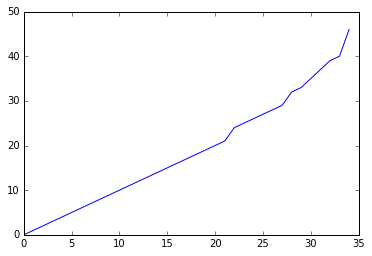

In [10]:

plt.plot(trainSet.lines)
plt.show()

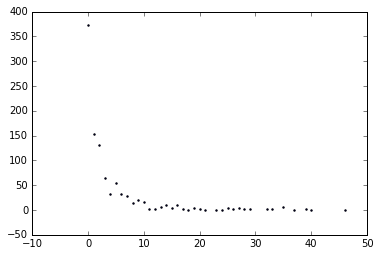

In [11]:
lines= [[i,j] for i,j in trainSet.linescount.iteritems()]

linesmat=mat(lines)

plt.scatter(linesmat[:,0].flatten().A[0],linesmat[:,1].flatten().A[0],s=2,c='blue')
plt.show()

0.027777777777777773


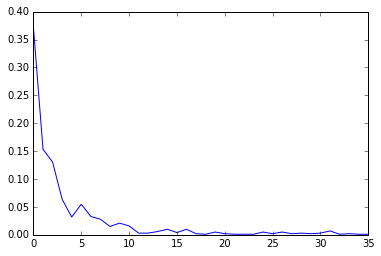

In [12]:
regression=linesmat[:,1]/float(sum(linesmat[:,1]))
plt.plot(regression)
#print(regression)
print(mean(regression))

[27, 78, 55, 23, 31, 59, 80, 45, 129, 2, 13, 68, 94, 48, 37, 63, 98, 73, 87, 137, 132, 50]


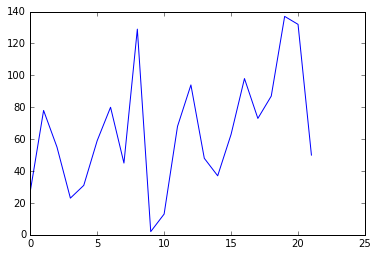

In [59]:
his3=[sum(trainMat[i,:]) for i in range(trainMat.shape[0])]

a=[sum(trainMat.T[:,i]) for i in range(trainMat.T.shape[1])]
print(a)

plt.plot(his3)

[30, 92, 39, 18, 216, 99, 41, 363, 120, 20, 112, 67, 31, 139, 42]


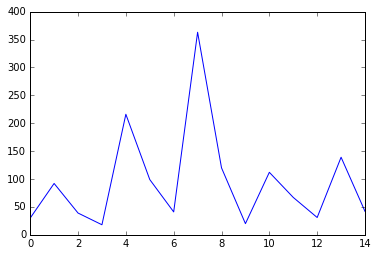

In [63]:
a=[sum(trainMat.T[i,:]) for i in range(trainMat.T.shape[0])]
print(a)

plt.plot(a)

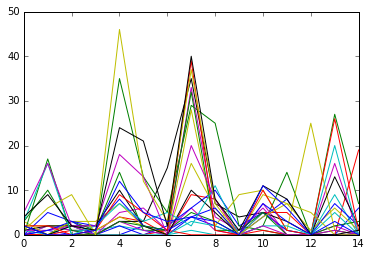

In [60]:
his3=trainMat.T

plt.plot(his3)
plt.show()

[0, 3, 0, 0, 8, 3, 0, 15, 4, 0, 4, 2, 0, 5, 0]


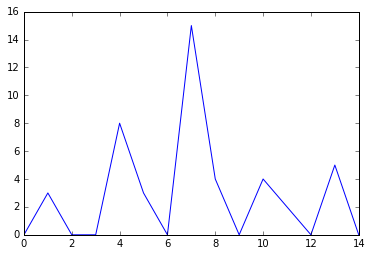

In [65]:
his1=[int(mean(trainMat[:,i])-1) for i in range(15)]
plt.plot(his1)

print(his1)

[[ 2  0  0  1 12  5  3  4  3  0 11  6  0  3  0]]


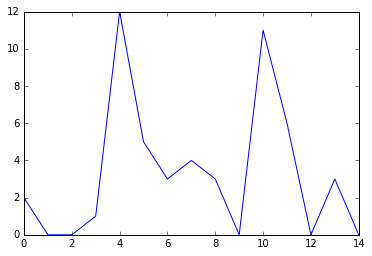

In [15]:
print(trainMat[-1:])
plt.plot(trainMat[-1:].T)

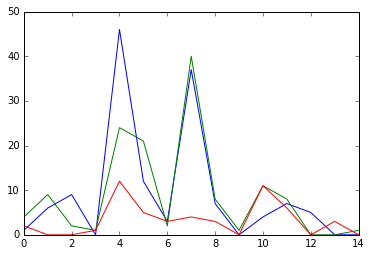

In [27]:
#print(trainMat[-4:])
plt.plot(trainMat[-3:].T)

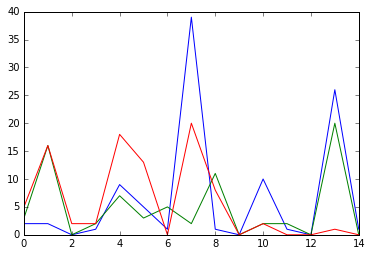

In [28]:
plt.plot(trainMat[-6:-3].T)

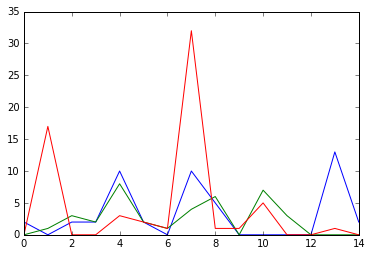

In [32]:
plt.plot(trainMat[-9:-6].T)

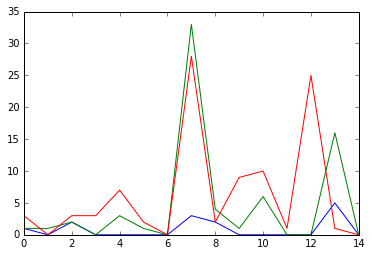

In [34]:
plt.plot(trainMat[-12:-9].T)

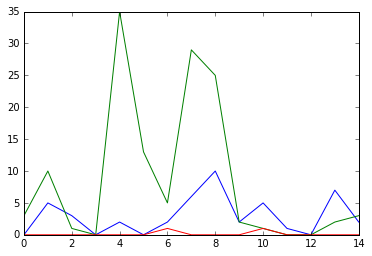

In [40]:
plt.plot(trainMat[-15:-12].T)

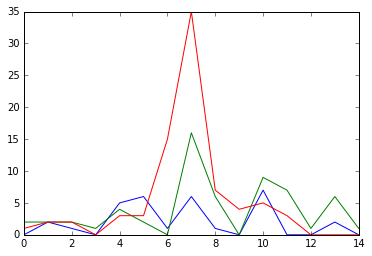

In [42]:
plt.plot(trainMat[-18:-15].T)

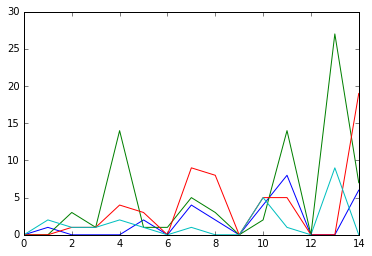

In [38]:
plt.plot(trainMat[:-18].T)